In [1]:
from util import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Connected DB CINS_SMY - conn
Connected oraDW_ANALYTICS - conn_aly


In [2]:
cohort09_query = """WITH
T0 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_CUST_STT_CHG_01092023),
T1 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_SCORE_01092023),
T2 AS (
    SELECT *
        FROM (SELECT T0.*, T1.SCORE
        FROM T0 INNER JOIN T1 ON T0.CUSTOMER_CDE = T1.CUSTOMER_CDE
        WHERE REACTIVATED IS NOT NULL
        AND CUST_STT_LAG <= 1
        ORDER BY SCORE DESC)
    WHERE ROWNUM <= 500000),
T3 AS (
    SELECT *
    FROM DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT
    WHERE SD_TKTT = 1),
T4 AS (
    SELECT T2.CUSTOMER_CDE, T3.PROCESS_DT AS RPT_DT,
        MAX(CASE
            WHEN T3.CUST_STATUS = 'HOAT DONG' THEN 2
            WHEN T3.CUST_STATUS = 'NGU DONG' THEN 1
            WHEN T3.CUST_STATUS = 'DONG BANG' THEN 0
        END) AS CUST_STT
    FROM T2 INNER JOIN T3 ON T2.CUSTOMER_CDE = T3.CUSTOMER_CDE
    WHERE PROCESS_DT = TO_DATE('31-12-2022', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-01-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('28-02-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-03-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-04-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-05-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-06-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-07-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-08-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-09-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-10-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-11-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-12-2023', 'DD-MM-YY')
    GROUP BY T2.CUSTOMER_CDE, T3.PROCESS_DT),
T5 AS (
    SELECT CUSTOMER_CDE, 
    -- RPT_DT
    LAG(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG9,
    LAG(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG8,
    LAG(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG7,
    LAG(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG6,
    LAG(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG5,
    LAG(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG4,
    LAG(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG3,
    LAG(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG2,
    LAG(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG1,
    RPT_DT, 
    LEAD(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD1, 
    LEAD(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD2,
    LEAD(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD3,
    LEAD(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD4,
    LEAD(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD5,
    LEAD(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD6,
    LEAD(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD7,
    LEAD(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD8,
    LEAD(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD9,
    -- STATUS
    LAG(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG9,
    LAG(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG8,
    LAG(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG7,
    LAG(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG6,
    LAG(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG5,
    LAG(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG4,
    LAG(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG3,
    LAG(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG2,
    LAG(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG1,
    CUST_STT, 
    LEAD(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD1,
    LEAD(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD2,
    LEAD(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD3,
    LEAD(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD4,
    LEAD(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD5,
    LEAD(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD6,
    LEAD(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD7,
    LEAD(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD8,
    LEAD(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD9
    FROM T4
),
T6 AS (
    SELECT * FROM T5
    WHERE RPT_DT = TO_DATE('31-08-2023', 'DD-MM-YY')),
T7 AS (
    SELECT T6.*, T2.SCORE
    FROM T6
    INNER JOIN T2 ON T6.CUSTOMER_CDE = T2.CUSTOMER_CDE
    ORDER BY T2.SCORE DESC
)
SELECT * 
FROM T7"""

In [3]:
cohort09 = download_or_reload('data/COHORT_09', cohort09_query)

Len 500000


In [4]:
cohort09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CUSTOMER_CDE    500000 non-null  object        
 1   RPT_DT_LAG9     0 non-null       object        
 2   RPT_DT_LAG8     358411 non-null  datetime64[ns]
 3   RPT_DT_LAG7     375649 non-null  datetime64[ns]
 4   RPT_DT_LAG6     391728 non-null  datetime64[ns]
 5   RPT_DT_LAG5     412588 non-null  datetime64[ns]
 6   RPT_DT_LAG4     434951 non-null  datetime64[ns]
 7   RPT_DT_LAG3     460135 non-null  datetime64[ns]
 8   RPT_DT_LAG2     467930 non-null  datetime64[ns]
 9   RPT_DT_LAG1     475644 non-null  datetime64[ns]
 10  RPT_DT          500000 non-null  datetime64[ns]
 11  RPT_DT_LEAD1    499981 non-null  datetime64[ns]
 12  RPT_DT_LEAD2    499875 non-null  datetime64[ns]
 13  RPT_DT_LEAD3    499797 non-null  datetime64[ns]
 14  RPT_DT_LEAD4    496315 non-null  dat

In [5]:
cohort09

,CUSTOMER_CDE,RPT_DT_LAG9,RPT_DT_LAG8,RPT_DT_LAG7,RPT_DT_LAG6,RPT_DT_LAG5,RPT_DT_LAG4,RPT_DT_LAG3,RPT_DT_LAG2,RPT_DT_LAG1,...,CUST_STT_LEAD1,CUST_STT_LEAD2,CUST_STT_LEAD3,CUST_STT_LEAD4,CUST_STT_LEAD5,CUST_STT_LEAD6,CUST_STT_LEAD7,CUST_STT_LEAD8,CUST_STT_LEAD9,SCORE
0,18336713,None,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,None,None,None,None,None,0.983401
1,18339697,None,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,None,None,None,None,None,0.983401
2,18331391,None,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,None,None,None,None,None,0.983401
3,18331452,None,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,None,None,None,None,None,0.983401
4,18331453,None,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,None,None,None,None,None,0.983401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,16937593,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,...,1.0,1.0,1.0,1.0,None,None,None,None,None,0.005936
499996,17001340,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,...,1.0,1.0,1.0,1.0,None,None,None,None,None,0.005936
499997,7892041,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,...,1.0,1.0,1.0,1.0,None,None,None,None,None,0.005936
499998,15974811,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,...,1.0,1.0,1.0,1.0,None,None,None,None,None,0.005936


In [6]:
def analyze_cohort(cohort):
    len_cohort = len(cohort)
    data = []
    num_react = len(cohort[cohort['CUST_STT'] == 2])
    rpt_dt = cohort['RPT_DT'].tolist()[0]
    cohort = cohort[cohort['CUST_STT'] != 2]
    len_not_react = len(cohort)
    data.append((rpt_dt,num_react, len_not_react))
    if len(cohort) > 0:
        for i in range(1,10):
            if len(cohort) > 0:
                lead_mth = f'CUST_STT_LEAD{i}'
                num_react = len(cohort[cohort[lead_mth] == 2])
                rpt_dt = cohort[f'RPT_DT_LEAD{i}'].tolist()[0]
                cohort = cohort[cohort[lead_mth] != 2]
                len_not_react = len(cohort)
                data.append((rpt_dt,num_react, len_not_react))
    res_df = pd.DataFrame(data=data, columns=['RPT_DT', 'NUM_REACT', 'NUM_NOT_REACT'])
    res_df['PERC_REACT_PREV_MOB'] = res_df['NUM_REACT'].shift(-1) / res_df['NUM_NOT_REACT']
    res_df['PERC_REACT_PREV_MOB'] = res_df['PERC_REACT_PREV_MOB'].shift()
    res_df['CUMSUM'] = res_df['NUM_REACT'].cumsum()
    res_df['PERC'] = res_df['CUMSUM'] / len_cohort
    res_df = res_df[res_df['RPT_DT'].notnull()]
    ax = sns.barplot(res_df, x='RPT_DT', y='NUM_REACT')
    sns.lineplot(res_df['CUMSUM'], ax=ax)
    plt.show()
    return res_df

10000


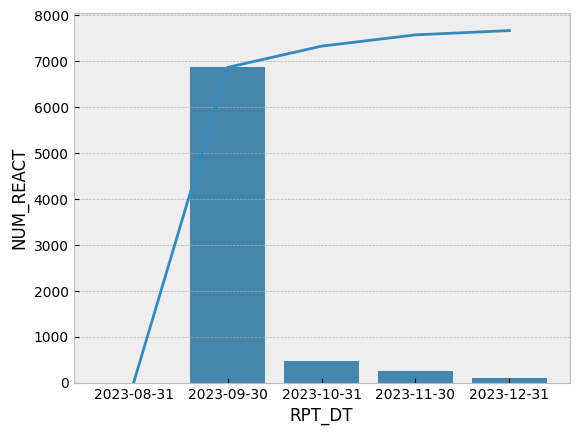

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-08-31,0,10000,NaN,0,0.0000
1,2023-09-30,6864,3136,0.686400,6864,0.6864
2,2023-10-31,463,2673,0.147640,7327,0.7327
3,2023-11-30,246,2427,0.092031,7573,0.7573
4,2023-12-31,93,2334,0.038319,7666,0.7666


50000


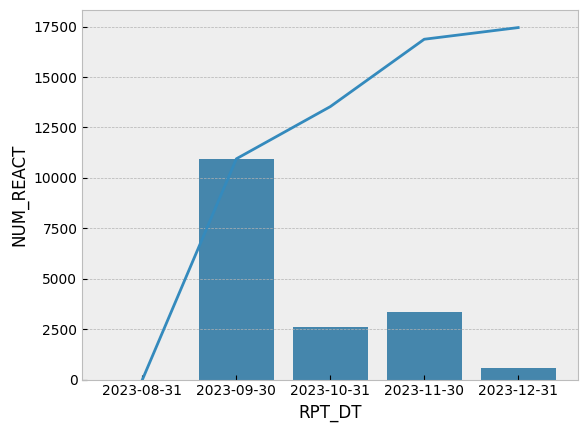

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-08-31,0,50000,NaN,0,0.00000
1,2023-09-30,10947,39053,0.218940,10947,0.21894
2,2023-10-31,2588,36465,0.066269,13535,0.27070
3,2023-11-30,3341,33124,0.091622,16876,0.33752
4,2023-12-31,578,32546,0.017450,17454,0.34908


100000


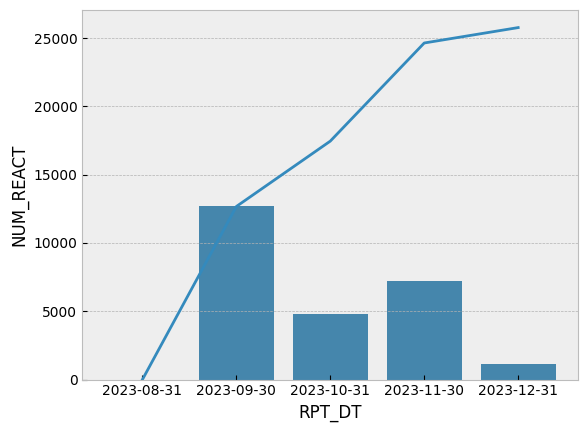

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-08-31,0,100000,NaN,0,0.00000
1,2023-09-30,12669,87331,0.126690,12669,0.12669
2,2023-10-31,4785,82546,0.054792,17454,0.17454
3,2023-11-30,7182,75364,0.087006,24636,0.24636
4,2023-12-31,1128,74236,0.014967,25764,0.25764


200000


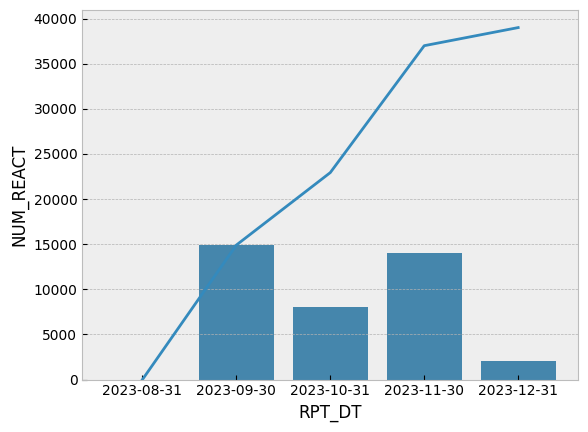

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-08-31,0,200000,NaN,0,0.000000
1,2023-09-30,14906,185094,0.074530,14906,0.074530
2,2023-10-31,8031,177063,0.043389,22937,0.114685
3,2023-11-30,14061,163002,0.079412,36998,0.184990
4,2023-12-31,2007,160995,0.012313,39005,0.195025


300000


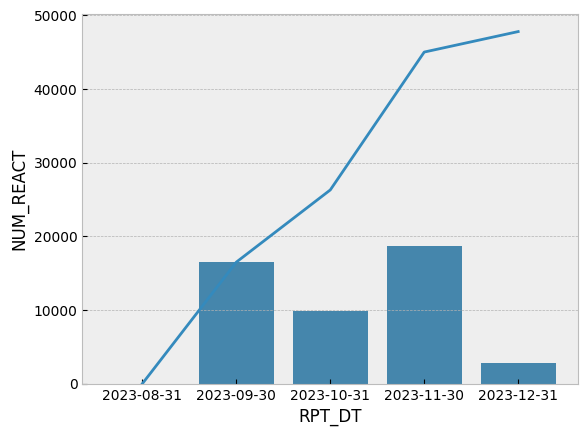

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-08-31,0,300000,NaN,0,0.000000
1,2023-09-30,16491,283509,0.054970,16491,0.054970
2,2023-10-31,9798,273711,0.034560,26289,0.087630
3,2023-11-30,18716,254995,0.068379,45005,0.150017
4,2023-12-31,2780,252215,0.010902,47785,0.159283


500000


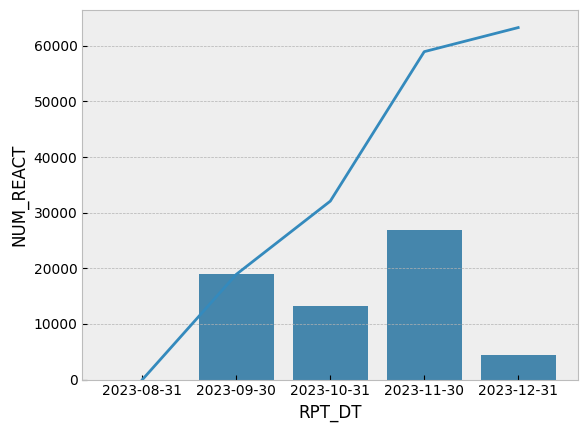

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-08-31,0,500000,NaN,0,0.000000
1,2023-09-30,18925,481075,0.037850,18925,0.037850
2,2023-10-31,13158,467917,0.027351,32083,0.064166
3,2023-11-30,26871,441046,0.057427,58954,0.117908
4,2023-12-31,4330,436716,0.009818,63284,0.126568


In [7]:
for limit in [10000, 50000, 100000, 200000, 300000, 500000]:
    print(limit)
    res_df = analyze_cohort(cohort09[:limit])
    display(res_df)